In [1]:
# Load required modules ===============================================================
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Load data/Read in CSV files ===============================================================
case_reduction = pd.read_csv('Model - % Case Reduction.csv')

In [ ]:
# Extract data from dataset
with_strain = list(case_reduction['With Strain Replacement'])
no_strain = list(case_reduction['No Strain Replacement'])
# Extract error values
with_strain_err = [list(case_reduction['With Strain Replacement'] - case_reduction['With Strain Replacement.2']),
                  list(case_reduction['With Strain Replacement.1'] - case_reduction['With Strain Replacement'])]
no_strain_err = [list(case_reduction['No Strain Replacement'] - case_reduction['No Strain Replacement.2']),
                  list(case_reduction['No Strain Replacement.1'] - case_reduction['No Strain Replacement'])]

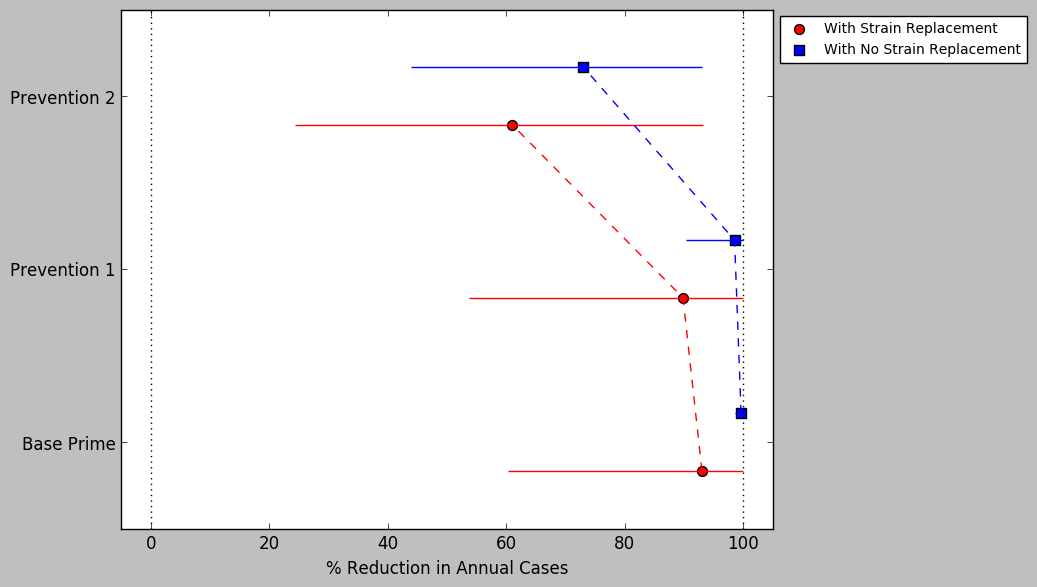

In [7]:
mpl.style.use('classic') # Use classic MPL layout
with_strain_y = np.arange(0, 3*len(with_strain), 3)  # Step of 3: red dot, blue dot, empty space
no_strain_y = np.arange(1, 3*len(no_strain)+1, 3)  # Step of 3: red dot, blue dot, empty space
with_strain_replacement = plt.scatter(with_strain, with_strain_y, c='r', s=50)
with_no_strain_replacement = plt.scatter(no_strain, no_strain_y, s=50, marker = 's')
plt.errorbar(no_strain, no_strain_y, xerr=no_strain_err, capsize=0, ls='--')
plt.errorbar(with_strain, with_strain_y, xerr=with_strain_err, capsize=0, color='red', ls='--')
plt.yticks((with_strain_y+no_strain_y)/2., ('Base Prime', 'Prevention 1', 'Prevention 2'))
plt.xlim([-5,105])
plt.axvline(x=0, color='black', ls=':')
plt.axvline(x=100, color='black', ls=':')
plt.xlabel('% Reduction in Annual Cases')
plt.legend((with_strain_replacement, with_no_strain_replacement), 
           ('With Strain Replacement', 'With No Strain Replacement'),
           loc='upper left', bbox_to_anchor=(1, 1), prop={'size':10}, scatterpoints = 1)
plt.tight_layout() # Ensure tight layout so legend/labels are not cut off
plt.savefig('Model - % Case Reduction.pdf', bbox_inches="tight") # Save plot to PDF